# Práctica de Laboratorio de Filtros Digitales con Scipy Signal
#### Curso: Procesamiento Digital de Señales
#### Universidad de Antioquia
#### Facultad de Ingeniería
#### Departamento de Ingeniería Electrónica y de Telecomunicaciones
#### Ingeniería de Telecomunicaciones

## Objetivo: entender cómo la librería _scipy.signal_ opera con filtros

# Pregunta 1

In [2]:
# Esta celda contiene importaciones, variables y funciones requeridas por el código más adelante en el cuaderno
from ipywidgets import interact # Para los widgets de controles 
import matplotlib.pylab as plt  # Para las gráficas
import numpy as np              # Para operaciones con vectores
from scipy import signal        # Para el procesamiento de señales
%matplotlib inline

## Preguntas 1.X resumidas en una celda de código

In [4]:
@interact(
    frecuencia_corte=(0.0005, 1, 0.1),
    tipo_banda=["lowpass", "highpass"], 
    clase_filtro=["butterworth", "chebyshev1", "chebyshev2", "elliptic", "bessel"], 
    orden=(1, 10, 1),
    rizado_dB=(0.0, 5, 0.3)
    )
def filtrar_buffer(frecuencia_corte, tipo_banda, clase_filtro, orden, rizado_dB):
    
    # ----- Pregunta 1.1: Construir la señal buffer ----- #
    NUM_SAMPLES = 200
    vector_tiempo_normalizado = np.linspace(0, 1, NUM_SAMPLES)
    f1 = 1000
    f2 = 11000 
    f3 = 20000
    buffer = np.sin(vector_tiempo_normalizado*2*np.pi*f1) + np.sin(vector_tiempo_normalizado*2*np.pi*f2) + np.sin(vector_tiempo_normalizado*2*np.pi*f3)

    # ---- Pregunta 1.2 ----- #
    # Calcular los coeficientes (b, a) de un filtro dado por el parámetro 
    # "clase_filtro" para el corte dado.
    if clase_filtro == "butterworth":
        b, a = signal.butter(orden, frecuencia_corte, btype=tipo_banda, analog=False)
    elif clase_filtro == "chebyshev1":
        b, a = signal.cheby1(orden, rizado_dB, frecuencia_corte, btype=tipo_banda, analog=False)
    elif clase_filtro == "chebyshev2":
        b, a = signal.cheby2(orden, 30, frecuencia_corte, btype=tipo_banda, analog=False)
    elif clase_filtro == "elliptic":
        b, a = signal.ellip(orden, rizado_dB, 30, frecuencia_corte, btype=tipo_banda, analog=False)
    elif clase_filtro == "bessel":
        b, a = signal.bessel(orden, frecuencia_corte, btype=tipo_banda, analog=False)
    
    # ---- Pregunta 1.3: Calcular la respuesta al impulso ---- #
    vector_frecuencias_angulares_normalizadas, respuesta = signal.freqz(b, a, worN=8000)
    respuesta_amplitud = np.abs(respuesta)
    respuesta_potencia_dB = 20*np.log10(np.abs(respuesta))
    
    # ---- Pregunta 1.4: Obtener la señal filtrada ---- #
    buffer_f_iir = signal.lfilter(b, a, buffer)
    
    #  Configurar el tamaño de las gráficas
    plt.figure(figsize=(8,9))
    
    # Graficar la señal de entrada
    plt.subplot(2,2, 1)
    plt.plot(vector_tiempo_normalizado, buffer)
    plt.ylim(bottom=-3, top=3)
    plt.title("Entrada al filtro IIR")
    plt.xlabel("Tiempo normalizado")
    plt.ylabel("Amplitud")

    # Graficar la respuesta unitaria al impulso
    plt.subplot(2,2, 2)
    plt.plot( vector_frecuencias_angulares_normalizadas / (2 * np.pi), respuesta_amplitud)
    plt.title("Respuesta unitaria al impulso")
    plt.ylabel("Amplitud unitaria")
    plt.xlabel("Frecuencia (Hz/muestra)")
    plt.grid()

    # Graficar la respuesta logarítmica al impulso
    plt.subplot(2,2, 4)
    plt.plot( vector_frecuencias_angulares_normalizadas / (2 * np.pi), respuesta_potencia_dB)
    plt.title("Respuesta logarítmica al impulso")
    plt.ylabel("Amplitud unitaria")
    plt.xlabel("Frecuencia (Hz/muestra)")
    plt.axhline(-3, ls='--', color='red')
    plt.grid(True, which="both")
    plt.ylim([-30,1])

    # Graficar la salida del filtro
    plt.subplot(2,2, 3)
    plt.plot(vector_tiempo_normalizado, buffer_f_iir)
    plt.ylim(bottom=-3, top=3)
    plt.title("Salida del filtro IIR")
    plt.xlabel("Tiempo normalizado")
    plt.ylabel("Amplitud")
    
    plt.show()

interactive(children=(FloatSlider(value=0.4005, description='frecuencia_corte', max=1.0, min=0.0005), Dropdown…

## Respuestas a las preguntas 1.X
1.1. ¿A qué hace referencia el tiempo normalizado y cuál es su ventaja sobre el tiempo medido en segundos? \\
Significa que el eje temporal no está medido en segundos o milisegundos sino en muestras. Eso evita la necesidad de calcular exactamente la frecuencia de muestreo lo que posibilita que una misma señal será muestreada a la frecuencia que se desee para la aplicación que lo requiera al momento de su implementación. Esa es la ventaja de utilizar señales digitales $x[n]$ por sobre señales analógicas $x(t)$.

1.2. ¿En cuáles filtros aparece el rizado y a qué hace referencia este? ¿Por qué es importante tenerlo en cuenta? \\
El rizado son las ondulaciones que se presentan en las bandas pasantes o atenuadas. \\
El elíptico lo presenta en ambas bandas, el Chebyshev 1 lo presenta en la banda pasante y el 2 en la atenuada.\\
Estos filtros están diseñados para tener una transición más rápida entre la banda de paso y la banda de parada que otros tipos de filtros, como los filtros Butterworth. Para lograr esta transición más rápida, se permite un rizado en la banda pasante o en la banda atenuada.

1.3. 
- ¿Qué observa en los filtros Butterworth y Bessel en común con las demás clases de filtros y qué diferencia puede observar entre ellos? ¿Cuál es su utilidad? \\
Los filtros **Butterworth** y **Bessel** son estables en comparación con los demás entre la lista de filtros puesto que ni la banda pasante ni la banda suprimida se presentan rizados en la respuesta al impulso. La diferencia entre estos dos es que el filtro Bessel presenta una banda de transición mucho más ancha que la Butterworth lo que limita el desempeño del filtrado. Este comportamiento del filtro **Bessel** es útil en contadas aplicaciones donde no se desea que el efecto del filtrado sea notorio, por ejemplo, en un ecualizador de audio que no gustaría de una alteración profunda del sonido original.
- ¿Por qué es útil tener en cuenta ambas versiones? \\
Porque la respuesta en amplitud otorga el factor o ganancia unitaria del filtro que muestra cómo se filtran las componentes frecuenciales de una señal sin amplificarla o atenuarla globalmente.
- ¿Por qué es importante este punto de -3 dB? \\
Una de las características clave de un filtro es su frecuencia de corte. Ésta se define como el punto situado en la banda de transición (***rolloff***), situada entre la banda pasante (la banda filtrada) y la banda atenuada, punto en el cual las potencias de las frecuencias se consideran como atenuadas puesto que la ganancia cae a $\frac{1}{\sqrt 2}$ respecto de la banda pasante (el llamado "punto de $-3dB$").
Dado que es difícil fabricar un filtro con una transición nítida entre la banda filtrada y la banda atenuada, hay una pendiente en esta región que no es infinita, ya que las frecuencias se van atenuando cada vez más a medida que se acercan a la banda atenuada.
- ¿Qué puede notar en la respuesta al impulso de los filtros que son afectados por este rizado? \\
A medida que aumenta el rizado, las bandas pasantes o atenuadas son mucho más inestables pero la banda de transición es mucho más estrecha, cuya pendiente tiene a infinito. Es un balance entre costos y ventajas, factores que deben tenerse en cuenta al momento de elegir un filtro según los propósitos de la aplicación. Si la fidelidad de la información a la salida del filtro se debe conservar por sobre la calidad del filtrado, el rizado no es conveniente, por lo que se elegiría un filtro Butterworth o Bessel. Por el contrario, si los datos de salida del filtro no se necesitan para compararlos con los datos de entrada sino que el filtrado debe tener la mayor calidad posible, el rizado es conveniente.
El rizado altera la potencia original de las componentes espectrales pasantes de la señal original.

1.4. ¿Qué diferencias encuentra con la señal de entrada? \\
En el modo de pasabaja se nota que a medida que baja la frecuencia de corte, se eliminan más frecuencias altas y medias, hasta que sólo quedan las más bajas. En el modo de pasaaltas, ocurre lo contrario. 

# Pregunta 2
## Pregunta 2.1

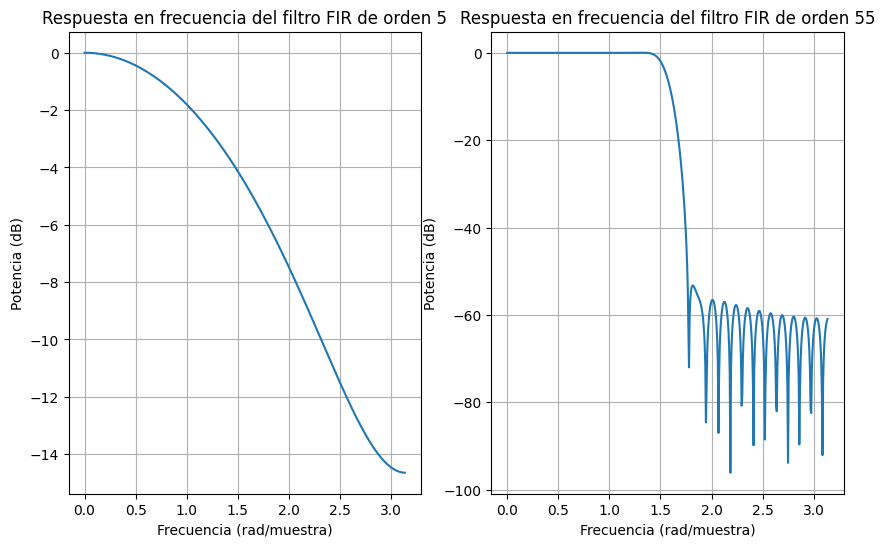

In [5]:
# Frecuencia de corte del filtro pasabajas
frecuencia_corte = 0.5

# Orden del filtro FIR
orden_filtro_1 = 5
orden_filtro_2 = 55

# Crear la respuesta de impulso del filtro FIR (pasa altas)
respuesta_impulso_1 = signal.firwin(orden_filtro_1, frecuencia_corte,)
respuesta_impulso_2 = signal.firwin(orden_filtro_2, frecuencia_corte,)

# Calcular la respuesta en frecuencia del filtro FIR
vector_frecuencias_1, respuesta_frecuencia_1 = signal.freqz(respuesta_impulso_1)
vector_frecuencias_2, respuesta_frecuencia_2 = signal.freqz(respuesta_impulso_2)

# Graficar la respuesta en frecuencia filtro de orden 5
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(vector_frecuencias_1, 20 * np.log10(np.abs(respuesta_frecuencia_1)))
plt.title('Respuesta en frecuencia del filtro FIR de orden 5')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Potencia (dB)')
plt.grid()

# Graficar la respuesta en frecuencia filtro de orden 5
plt.subplot(1,2,2)
plt.plot(vector_frecuencias_2, 20 * np.log10(np.abs(respuesta_frecuencia_2)))
plt.title('Respuesta en frecuencia del filtro FIR de orden 55')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Potencia (dB)')
plt.grid()

plt.show()

## Respuesta a la pregunta 2.1
¿Qué observa de las respuestas al impulso? \\
La respuesta del filtro de orden 5 es bastante suave en su banda de transición, tanto que no pareciera que hubiera una banda pasante y una atenuada bien definidas, lo que da cuenta de que los órdenes bajos son muy rápidos de calcular pero ofrecen un pésimo rendimiento.

Por otro lado, la respuesta del filtro de orden superior es de muchísima más calidad pues la banda pasante es completamente estable hasta la mitad del rango de la frecuencia normalizada en rad/muestra, lo que tiene todo el sentido pues la frecuencia de corte normalizada es de 0.5. Luego la banda atenuada está por debajo de los -55 dB de potencia, lo que demuestra una excelente atenuación comparada con el filtro de orden 5 que atenuó sólo hasta -14.5 dB

## Pregunta 2.2

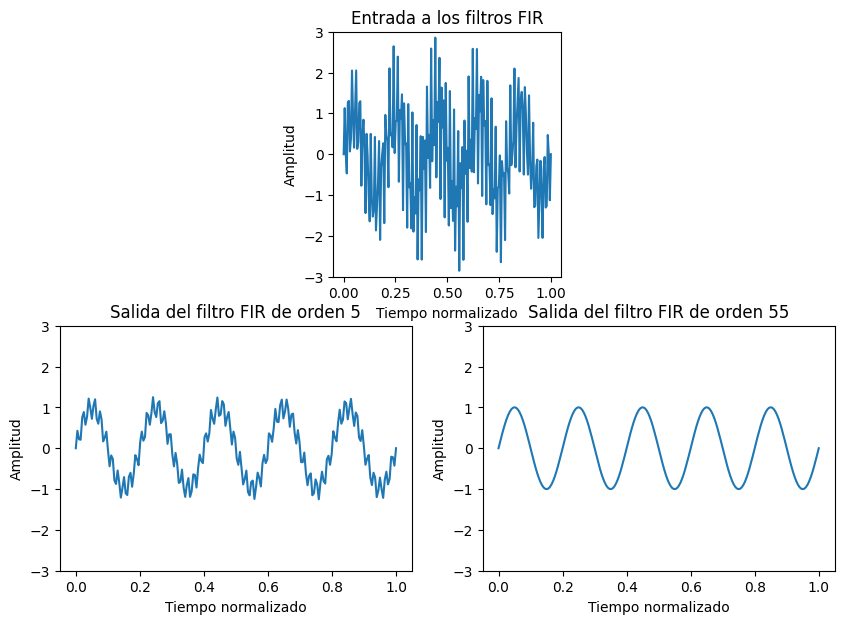

In [ ]:
NUM_SAMPLES = 200
vector_tiempo_normalizado = np.linspace(0, 1, NUM_SAMPLES)
f1 = 1000
f2 = 11000 
f3 = 20000
# Calcular el buffer
buffer = np.sin(vector_tiempo_normalizado*2*np.pi*f1) + np.sin(vector_tiempo_normalizado*2*np.pi*f2) + np.sin(vector_tiempo_normalizado*2*np.pi*f3)

# Calcular la señal filtrada con los dos tipos de filtro FIR
buffer_f_fir_1 = signal.filtfilt(respuesta_impulso_1, 1, buffer)
buffer_f_fir_2 = signal.filtfilt(respuesta_impulso_2, 1, buffer)

#  Configurar el tamaño de las gráficas
plt.figure(figsize=(10,7))

# Graficar la señal de entrada
plt.subplot(2,3, 2)
plt.plot(vector_tiempo_normalizado, buffer)
plt.ylim(bottom=-3, top=3)
plt.title("Entrada a los filtros FIR")
plt.xlabel("Tiempo normalizado")
plt.ylabel("Amplitud")

# Graficar la salida del filtro FIR orden 5
plt.subplot(2,2, 3)
plt.plot(vector_tiempo_normalizado, buffer_f_fir_1)
plt.ylim(bottom=-3, top=3)
plt.title("Salida del filtro FIR de orden 5")
plt.xlabel("Tiempo normalizado")
plt.ylabel("Amplitud")

# Graficar la salida del filtro FIR orden 5
plt.subplot(2,2, 4)
plt.plot(vector_tiempo_normalizado, buffer_f_fir_2)
plt.ylim(bottom=-3, top=3)
plt.title("Salida del filtro FIR de orden 55")
plt.xlabel("Tiempo normalizado")
plt.ylabel("Amplitud")

plt.show()

## Respuesta a la pregunta 2.2
El filtro de orden 5  filtra medianamente bien las componentes espectrales de la señal, comparada con el de orden 55 que aparece nítida. La señal de salida del segundo filtro no tiene amplificación ni atenuación, lo que implica filtración perfecta. 

# Pregunta 3


Text(0, 0.5, 'Amplitud (V)')

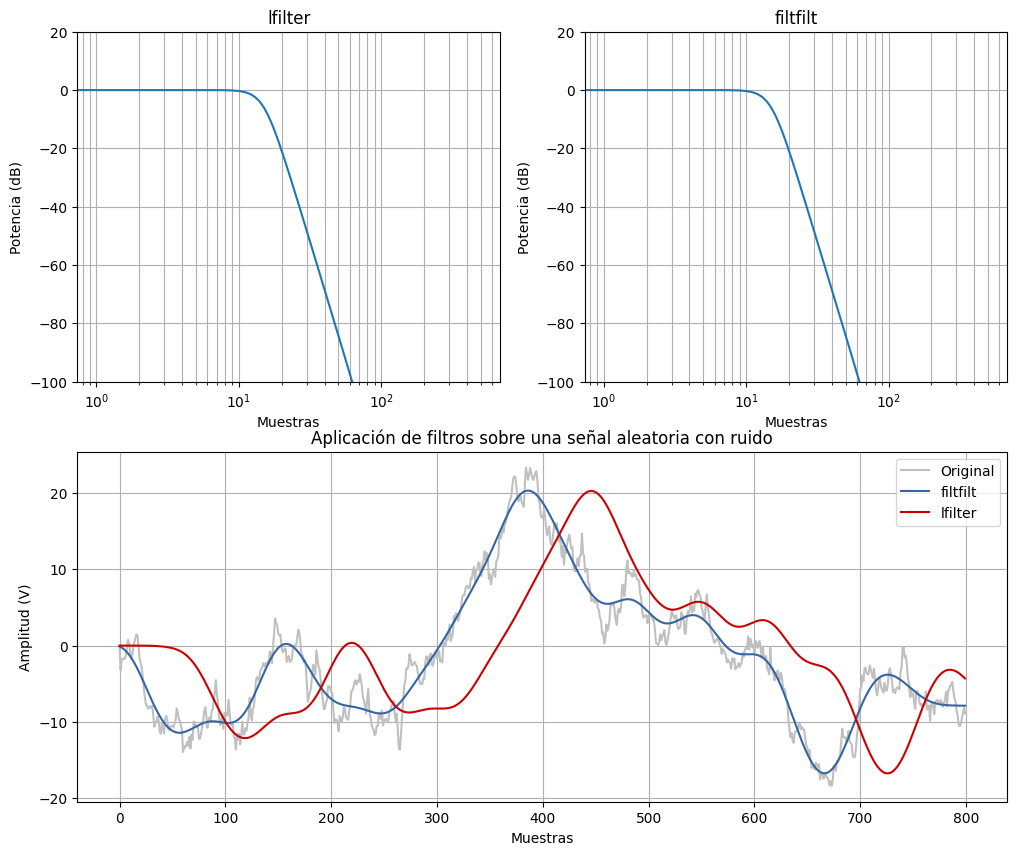

In [7]:
from numpy.random import randn # Para añadir ruido simulado
from numpy.fft import rfft     # Para aplicar la FFT a un vector de reales, es más rápido que aplicar el pleno FFT

plt.figure(figsize=(12,10))

# ---- Pregunta 3.1 ---- #
# Construir el filtro Butterworth usando los coeficientes B, A
b, a = signal.butter(N = 4, Wn = 0.03, analog=False, btype='lowpass')

# Crear el impulso para calcular la respuesta del filtro al impulso
impulso = np.zeros(1000)
impulso[500] = 1

# Aplicar el filtro hacia adelante y hacia atrás
respuesta_ff = signal.filtfilt(b, a, impulso)
potencia_dB_respuesta_ff = 20*np.log10(np.abs(rfft(respuesta_ff)))

# Aplicar el filtro lfilter 2 veces solo hacia adelante en el tiempo
respuesta_lf = signal.lfilter(b, a, signal.lfilter(b, a, impulso))
potencia_dB_respuesta_lf = 20*np.log10(np.abs(rfft(respuesta_ff)))

# Gráfica de respuesta en amplitud al impulso del filtfilt
plt.subplot(2, 2, 1)
plt.semilogx(potencia_dB_respuesta_ff)
plt.ylim(-100, 20)
plt.grid(True, which='both')
plt.title('lfilter')
plt.xlabel('Muestras')
plt.ylabel('Potencia (dB)')

# Gráfica de respuesta de potencia en dB al impulso del lfilter
plt.subplot(2, 2, 2)
plt.semilogx(potencia_dB_respuesta_lf)
plt.ylim(-100, 20)
plt.grid(True, which='both')
plt.title('filtfilt')
plt.xlabel('Muestras')
plt.ylabel('Potencia (dB)')

# ---- Pregunta 3.2: Crear Ruido Browniano (señal aleatoria con ruido gaussiano) ---- #
sig = np.cumsum(randn(800))
sig_ff = signal.filtfilt(b, a, sig) # Aplicar filtfilt
sig_lf = signal.lfilter(b, a, signal.lfilter(b, a, sig)) # Aplicar 2 veces lfilter para apreciar el efecto
plt.subplot(2, 1, 2)
plt.plot(sig, color='silver', label='Original')
plt.plot(sig_ff, color='#3465a4', label='filtfilt')
plt.plot(sig_lf, color='#cc0000', label='lfilter')
plt.grid(True, which='both')
plt.legend(loc="best")
plt.title('Aplicación de filtros sobre una señal aleatoria con ruido')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (V)')

## Respuestas a las preguntas 3.X
3.1. ¿Observa diferencia entre ambas gráficas de potencia? \\
No se observa ninguna diferencia. Ambos métodos producen el mismo efecto para todas las componentes espectrales de la señal.

3.2. 
- ¿Qué nota de característico entre ambos métodos de filtrado? \\
Aunque la magnitud de la respuesta en frecuencia de los filtros es idéntica (arriba a la izquierda y arriba a la derecha), la resultante del filtro pasabajas de fase cero (`filtfilt()`) se alinea con la señal original, mientras que el filtrado de fase mínima (`lfilter()`) retrasa la señal de forma causal.
- ¿Encuentra alguna utilidad en la diferencia entre ambos métodos? \\
  - `lfilter()` es sólo un filtro causal hacia adelante en el tiempo, similar a un filtro electrónico de la vida real. No puede ser de fase cero. Puede ser de fase lineal (FIR simétrico), pero normalmente no lo es. Normalmente añade diferentes cantidades de retardo de fase a diferentes frecuencias.

  - `filtfilt()` es el filtrado de fase cero, que no desplaza la señal mientras filtra. Como la fase es cero en todas las frecuencias, también es de fase lineal. Lo que hace este tipo de método es aplicar el filtro dos veces: una de izquierda a derecha y otra vez de derecha a izquierda, lo que produce que el desplazamiento de grupo causado por la primera aplicación sea contrarrestada por la segunda. Sin embargo, filtrar hacia atrás en el tiempo requiere predecir el futuro, por lo que no se puede utilizar en aplicaciones "en vivo" de la vida real, sino para el procesamiento de señales grabadas. Para el caso de aplicaciones que filtren señales al mismo tiempo que las reciben, el método `lfilter()` es el más apropiado.


# Conclusiones
- Los filtros IIR son muy diversos. Cada uno tiene características que los hacen perfectos para una situación determinada dependiento de la relación costo vs beneficio según sus características principales.
- El filtro Butterworth es perfecto para cuando no se desea que la información original se modifique, mientras que los filtros de rizado son perfectos para tener una banda de transición corta.
- Los filtros FIR son los mejores en cuando a calidad del filtrado se refiere debido a que la respuesta al impulso del filtro de orden 55 demuestra que la amplitud de la banda pasante se mantiene mientras que la atenuada se suprime completamente. El efecto negativo de este tipo de filtro es que se tarda en aplicarse el efecto del filtro puesto que no tiene retroalimentación. Así que, en comparación a los filtros IIR, estos no son efectivos a corto plazo pero sí lo son mucho a largo plazo.
- Para contrarrestar el efecto negativo de los filtros FIR de que tardan muchas muestras en hacer efecto, se puede utilizar el método de filtrado `filtfilt` que aplica el mismo filtro 2 veces: una vez hacia adelante y otra vez hacia atrás. Sin embargo, si el orden del filtro es muy alto, no puede procesar una señal puesto que el número de muestras requeridas para el filtrado puede sobrepasar la cantidad de muestras de la señal.
- El tiempo y frecuencias normalizadas son muy útiles para analizar de forma sencilla todos los filtros digitales. No se necesita una frecuencia de muestreo para entender perfectamente el comportamiento de los filtros, y se elimina el ruido causado por la información que no aporta al conocimiento profundo del proceso de filtrado en todas sus matices. El uso de tiempos y frecuencias reales (físicas) será de utilidad al momento de llevar estos modelos teóricos y simbólicos a una aplicación real. Si se necesita aplicar filtros para un ecualizador de sonido, se utilizará una frecuencia de muestreo de 441000 Hz, si se necesita aplicar en series de tiempo, se ofrecerá la información de la frecuencia de muestreo desde la documentación, si se necesita enviar una señal de voz a través de un canal telefónico, se utilizará una frecuencia de muestreo de 3200 Hz. En el sentido aplicativo, estos valores no importan, pero en el sentido teórico en el cual fue tratado este laboratorio, las magnitudes físicas reales no interesan en absoluto y sólo distraen de la conceptualización importante de todos los casos de uso de los filtros digitales.